In [5]:
#!pip install opencv-python
#!pip install pillow

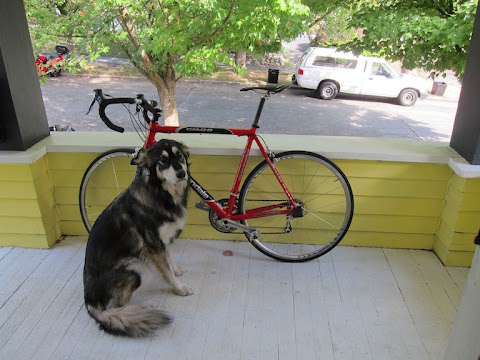

In [45]:
from PIL import Image
import numpy as np
# Open the image
# 1. Getting and setting pixels
im = Image.open("dog.jpg")

im = im.convert("RGB")
im

In [38]:
# Load pixels and manipulate them
pixels = im.load()
pixels

In [39]:
# Set red channel to 0 for every pixel
for row in range(im.size[1]):  # im.size[1] is the height
    for col in range(im.size[0]):  # im.size[0] is the width
        r, g, b = pixels[col, row]
        pixels[col, row] = (0, g, b)  # Set red channel to 0

# Save the modified image
im.save("dog_no_red.jpg")
#im.show()

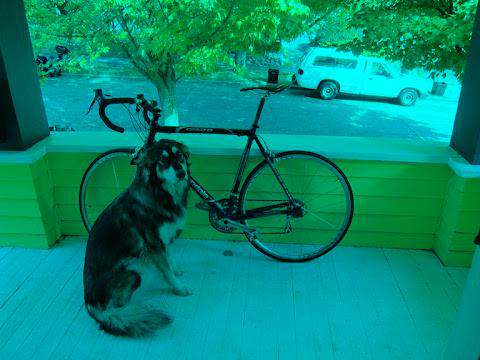

In [16]:
im = Image.open("dog_no_red.jpg")
im

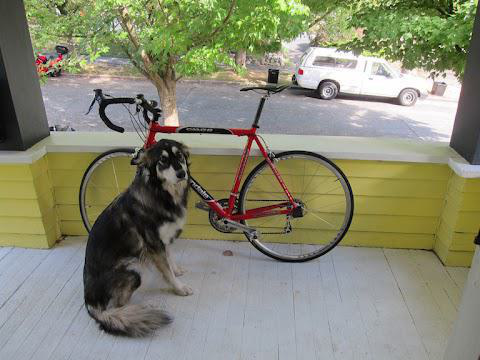

In [48]:
# Set red channel to 0 for every pixel
for row in range(im.size[1]):  # im.size[1] is the height
    for col in range(im.size[0]):  # im.size[0] is the width
        r, g, b = pixels[col, row]
        pixels[col, row] = (2, g, b)  # Set red channel to 0

# Save the modified image
im.save("dog_no_red1.jpg")
#im.show()
im = Image.open("dog_no_red1.jpg")
im

In [9]:
# 3. Grayscale image
im = Image.open("colorbar.png")

# Convert the image to grayscale
graybar = im.convert("L")  # "L" mode is for grayscale

# Save the grayscale image
graybar.save("graybar.png")
im.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Anwaar-ul-Karim Shah\\Documents\\myprojects\\Computer_vision\\colorbar.png'

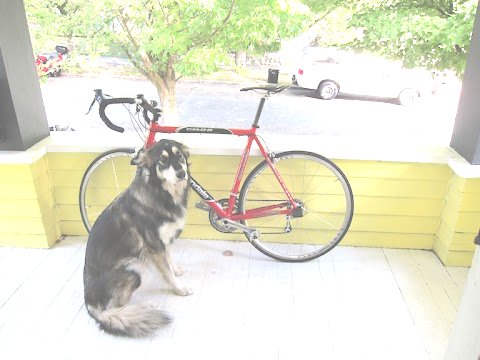

In [22]:
# 4. Shift Image

im = Image.open("dog.jpg")
im = im.convert("RGB")  # Ensure image is in RGB mode

# Convert the image to a NumPy array for easier manipulation
im_np = np.array(im, dtype=np.float32)  # Convert to float for safe manipulation

# Function to shift a specific channel (0: Red, 1: Green, 2: Blue)
def shift_image(image, channel, value):
    # Add the shift to the specified channel and clip the values to keep them between 0 and 255
    image[:, :, channel] = np.clip(image[:, :, channel] + (value * 255), 0, 255)

# Shift the Red, Green, and Blue channels by 0.4
shift_image(im_np, 0, .4)  # Shift the red channel
shift_image(im_np, 1, .4)  # Shift the green channel
shift_image(im_np, 2, .4)  # Shift the blue channel

# Convert back to an image
shifted_image = Image.fromarray(im_np.astype(np.uint8))

# Save the modified image
shifted_image.save("overflow.png")
#im.show()
im = Image.open("overflow.png")
im

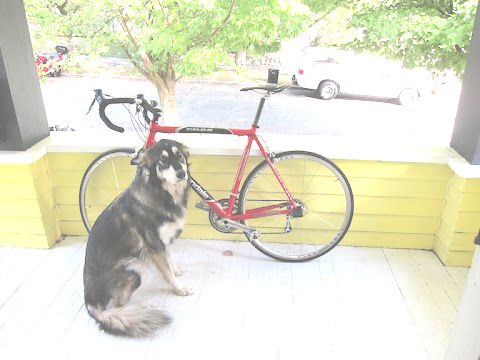

In [23]:
# 5. Clamp Image
# Load the image
im = Image.open("dog.jpg")
im = im.convert("RGB")  # Ensure the image is in RGB mode

# Convert the image to a NumPy array for easier manipulation
im_np = np.array(im, dtype=np.float32)  # Use float32 to allow overflows during processing

# Define a function to clamp the image pixel values between 0 and 255
def clamp_image(image):
    return np.clip(image, 0, 255)  # Clamp the values between 0 and 255

# Apply some manipulations (this would normally be the result of your image processing)
# For example, let’s assume we shifted colors or brightened the image
im_np += 100  # This increases all pixel values by 100, causing some to go over 255

# Now clamp the values to the valid range [0, 255]
im_np_clamped = clamp_image(im_np)

# Convert back to a Pillow image
im_clamped = Image.fromarray(im_np_clamped.astype(np.uint8))  # Convert back to uint8 format

# Save the clamped image
im_clamped.save("doglight_fixed.png")
#im.show()
im = Image.open("doglight_fixed.png")
im

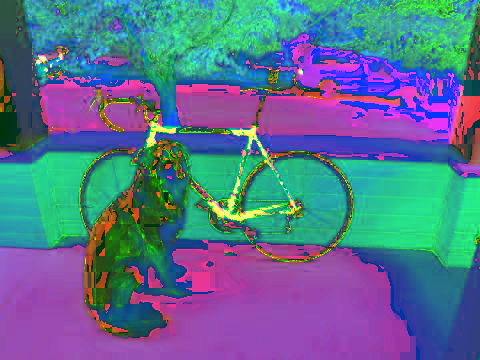

In [24]:
from PIL import Image
import numpy as np
# 6-7. Colorspace and saturation
# Load the image
im = Image.open("dog.jpg")
im = im.convert("RGB")  # Ensure image is in RGB mode

# Convert the image to a NumPy array for easier manipulation
im_np = np.array(im, dtype=np.float32) / 255.0  # Normalize to range [0, 1] for color manipulation

# Function to convert RGB to HSV
def rgb_to_hsv(image):
    return np.array(Image.fromarray((image * 255).astype(np.uint8)).convert("HSV"), dtype=np.float32) / 255.0

# Function to convert HSV back to RGB
def hsv_to_rgb(image):
    return np.array(Image.fromarray((image * 255).astype(np.uint8)).convert("RGB"), dtype=np.float32) / 255.0

# Convert the RGB image to HSV
im_hsv = rgb_to_hsv(im_np)

# Function to shift the saturation channel (1 is for the saturation channel in HSV)
def shift_image(image, channel, value):
    image[:, :, channel] = np.clip(image[:, :, channel] + value, 0, 1)  # Ensure it remains between 0 and 1

# Shift the saturation (increase by 0.2)
shift_image(im_hsv, 1, 0.2)

# Clamp the values to be between 0 and 1 (just in case)
def clamp_image(image):
    return np.clip(image, 0, 1)

im_hsv_clamped = clamp_image(im_hsv)

# Convert back to RGB
im_rgb = hsv_to_rgb(im_hsv_clamped)

# Convert the final image back to uint8 (0-255) for saving
im_rgb_uint8 = (im_rgb * 255).astype(np.uint8)

# Convert back to a Pillow Image and save
final_image = Image.fromarray(im_rgb_uint8)
final_image.save("dog_saturated.png")
#im.show()
im = Image.open("dog_saturated.png")
im

In [19]:
from PIL import Image

# Load the image
image_path = "dog.jpg"
im = Image.open(image_path)

# Print basic details about the image
print(f"Image Format: {im.format}")
print(f"Image Size (Width x Height): {im.size}")
print(f"Image Mode (Color Space): {im.mode}")

# To print raw pixel values (optional)
pixels = list(im.getdata())  # Get pixel values as a flat list
print(f"First 10 pixel values: {pixels[:10]}")  # Print first 10 pixel values

# Display the image
im.show()


Image Format: JPEG
Image Size (Width x Height): (480, 360)
Image Mode (Color Space): RGB
First 10 pixel values: [(58, 59, 51), (59, 60, 52), (60, 61, 53), (61, 62, 54), (61, 62, 54), (60, 61, 53), (58, 59, 51), (57, 58, 50), (58, 59, 51), (59, 60, 52)]
